In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay



In [4]:
# Step 2: Load Dataset
df = pd.read_csv('American_express_card.csv')
print("Dataset Preview:\n", df.head())
print("\nShape:", df.shape)
print("\nNull Values:\n", df.isnull().sum())


Dataset Preview:
    Credit Score  Geography  Gender   Age  Customer Since  Current Account  \
0         553.0      Delhi  Female  45.0             4.0            0.000   
1         447.0  Bengaluru    Male  31.0             7.0            0.000   
2         501.0      Delhi  Female  32.0             2.0            0.000   
3         428.0      Delhi    Male  51.0             3.0            0.000   
4         492.0      Delhi  Female  57.0             6.0      1912681.501   

   Num of products  UPI Enabled  Estimated Yearly Income  Closed  
0              4.0          1.0                 274150.0     0.0  
1              4.0          1.0                 519360.0     0.0  
2              4.0          1.0                 545501.0     0.0  
3              4.0          1.0                  86868.0     0.0  
4              2.0          1.0                 518680.0     0.0  

Shape: (9929, 10)

Null Values:
 Credit Score               2
Geography                  2
Gender                   

In [17]:
# Step 3A: Handle Null Values

# Drop rows where target is null
df = df[df['Closed'].notnull()]

# Fill numeric features with median
num_cols = ['Credit Score', 'Age', 'Customer Since', 'Current Account',
            'Num of products', 'UPI Enabled', 'Estimated Yearly Income']
for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# Fill categorical features with mode
cat_cols = ['Gender', 'Geography']
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

print("✅ Null values handled successfully.\n")
print(df.isnull().sum())


✅ Null values handled successfully.

Credit Score               0
Geography                  0
Gender                     0
Age                        0
Customer Since             0
Current Account            0
Num of products            0
UPI Enabled                0
Estimated Yearly Income    0
Closed                     0
dtype: int64


<ipython-input-17-be787069fae4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)
<ipython-input-17-be787069fae4>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

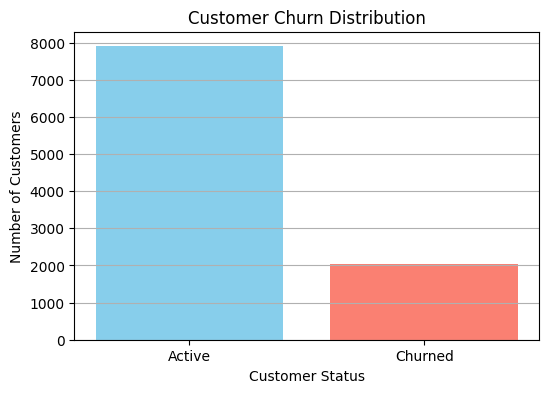

In [10]:
# Step 3: Target Column Visualization
churn_counts = df['Closed'].value_counts()
labels = ['Active', 'Churned']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,4))
plt.bar(labels, churn_counts, color=colors)
plt.title('Customer Churn Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.show()


In [11]:
# Step 4: Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)


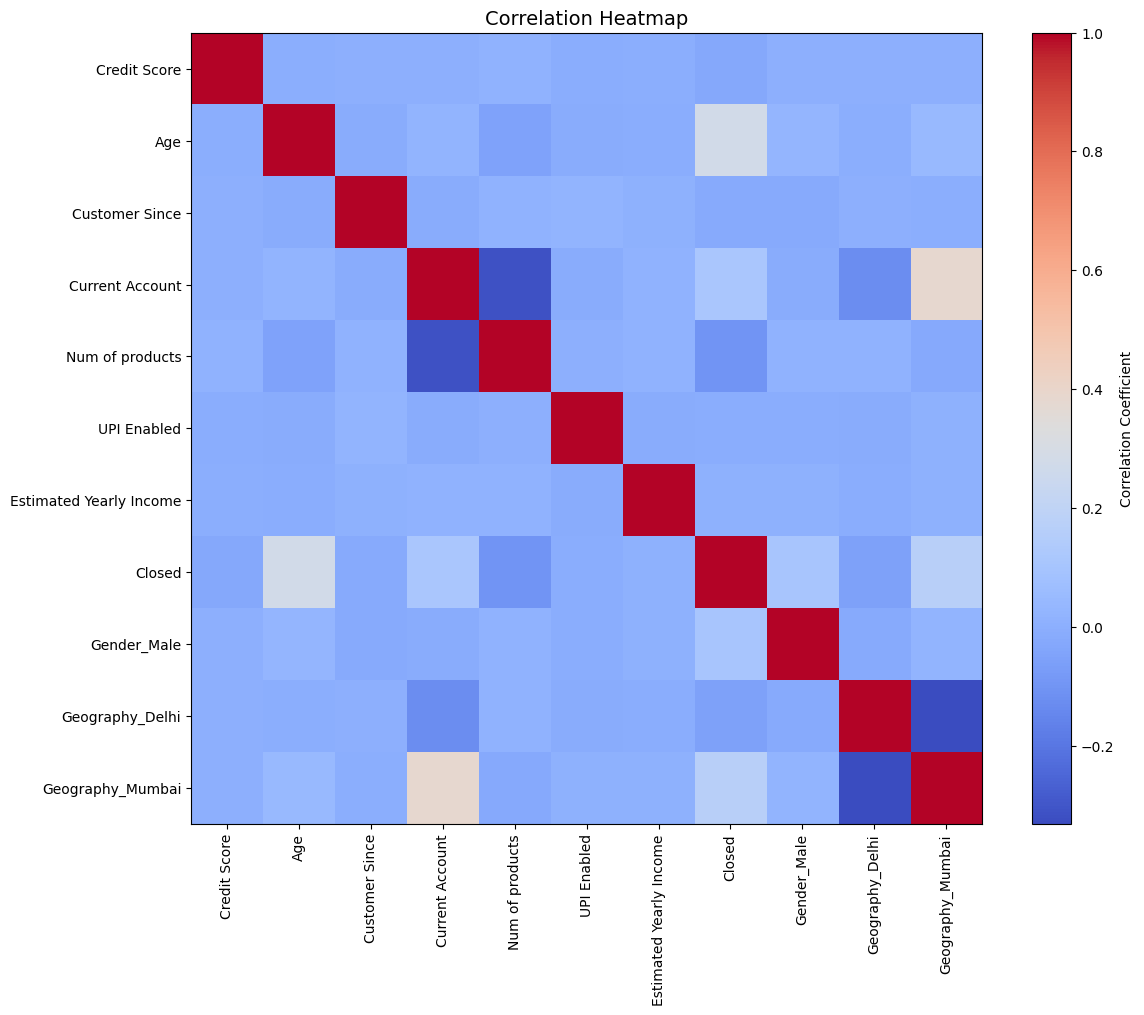

In [12]:
# Step 5: Correlation Matrix (Matplotlib Heatmap)
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()


In [13]:
# Step 6: Feature Split
X = df_encoded.drop('Closed', axis=1)
y = df_encoded['Closed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 7941, Testing Samples: 1986


In [14]:
# Step 7: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


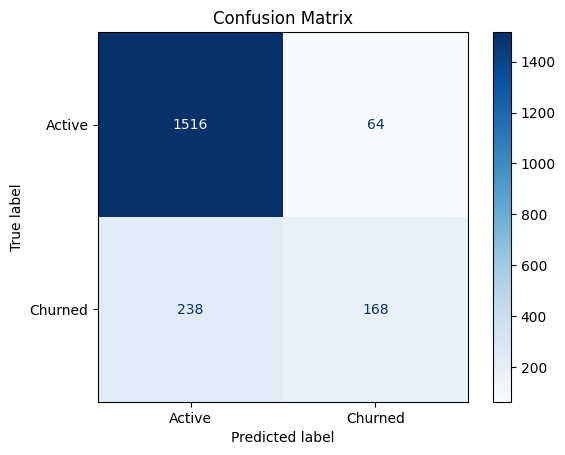

ROC AUC Score: 0.8311
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1580
         1.0       0.72      0.41      0.53       406

    accuracy                           0.85      1986
   macro avg       0.79      0.69      0.72      1986
weighted avg       0.84      0.85      0.83      1986



In [15]:
# Step 8: Evaluation

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Active", "Churned"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 2. ROC AUC Score
roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc:.4f}")

# 3. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


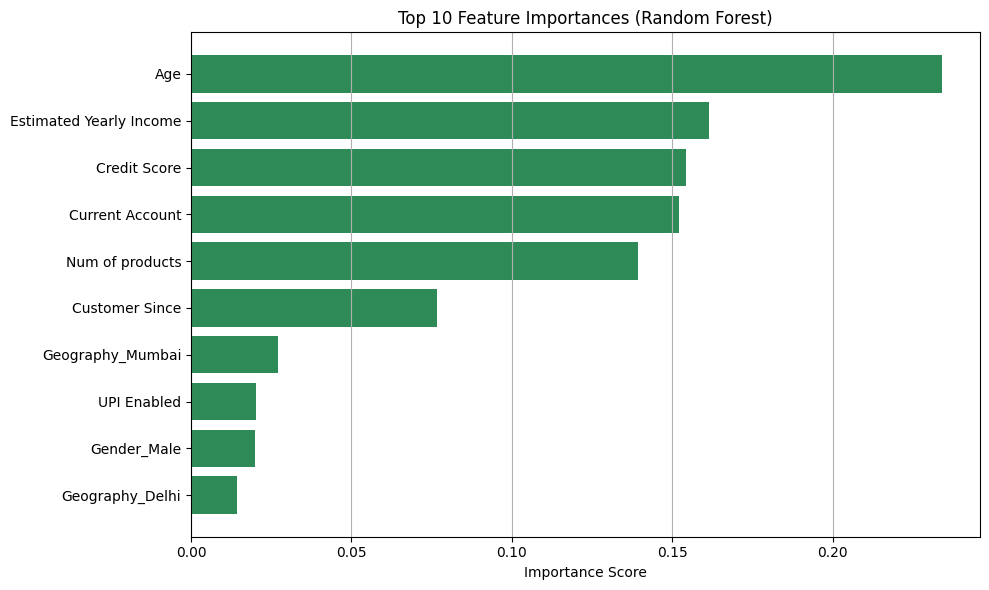

In [16]:
# Step 9: Feature Importance Plot (Matplotlib)
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color='seagreen')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()
